In [1]:
import pandas as pd
from constants import *
from helpers import normalise_number_data, normalise_word_data
import numpy as np
from sklearn import preprocessing

In [2]:
google_products = pd.read_csv(GOOGLE_SMALL_PATH)
amazon_products = pd.read_csv(AMAZON_SMALL_PATH)

In [3]:
google_products['price'] = normalise_number_data(google_products['price'])
amazon_products['price'] = normalise_number_data(amazon_products['price'])

In [4]:
google_products[['name']]
google_word_columns = ['name', 'description', 'manufacturer']
amazon_word_columns = ['title', 'description', 'manufacturer']

In [5]:
google_products[google_word_columns] = normalise_word_data(google_products[google_word_columns].astype(str))
amazon_products[amazon_word_columns] = normalise_word_data(amazon_products[amazon_word_columns].astype(str))

## Part 2
### Pre-processing discussion

    

In [6]:
yeast_data = pd.read_csv(YEAST_PATH)
yeast_data['Class'] = yeast_data.Class.replace(to_replace=yeast_data.Class.unique(), value=[0, 1])

In [8]:
from sklearn.impute import SimpleImputer    

In [9]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yeast_data.drop(['Class', 'Sample', 'pox'], axis=1), yeast_data['Class'], test_size=0.33)
X_train_mean = pd.DataFrame(mean_imputer.fit_transform(X_train))
X_train_median = pd.DataFrame(median_imputer.fit_transform(X_train))


X_test_mean = pd.DataFrame(mean_imputer.fit_transform(X_test))
X_test_median = pd.DataFrame(median_imputer.fit_transform(X_test))

#Y = yeast_data['Class']

In [11]:
X_train_mean.describe()

,0,1,2,3,4,5,6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.498940,0.500619,0.505062,0.267864,0.507262,0.507307,0.275412
std,0.130114,0.124254,0.237004,0.158757,0.105031,0.183179,0.102681
min,0.110000,0.130000,0.220000,0.000000,0.500000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.480000,0.220000
50%,0.498940,0.490000,0.505062,0.230000,0.500000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.530000,0.290000
max,1.000000,1.000000,7.501819,3.000728,3.500849,6.001456,1.000000


In [12]:
X_train_median.describe()

,0,1,2,3,4,5,6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.498149,0.500362,0.505424,0.263723,0.507043,0.507496,0.272736
std,0.130139,0.124265,0.237007,0.159326,0.105038,0.183181,0.103366
min,0.110000,0.130000,0.220000,0.000000,0.500000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.530000,0.290000
max,1.000000,1.000000,7.501819,3.000728,3.500849,6.001456,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler, normalize
stdscl = StandardScaler(with_mean=True, with_std=True)

In [14]:
X_train_std = pd.DataFrame(stdscl.fit_transform(X_train_median))
X_train_norm = pd.DataFrame(normalize(X_train_median))

X_test_std = pd.DataFrame(stdscl.fit_transform(X_test_median))
X_test_norm = pd.DataFrame(normalize(X_test_median))

In [15]:
X_train_std.describe()

,0,1,2,3,4,5,6
count,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02
mean,-2.055141e-16,-6.433486e-17,-1.465405e-16,2.716361e-16,5.647171e-16,1.429663e-17,-4.342603e-16
std,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00
min,-2.984074e+00,-2.981925e+00,-1.204893e+00,-1.656071e+00,-6.708659e-02,-2.771865e+00,-2.639876e+00
25%,-6.776854e-01,-6.470261e-01,-1.917548e-01,-5.885418e-01,-6.708659e-02,-1.501811e-01,-5.104475e-01
50%,-6.264839e-02,-8.342976e-02,1.931562e-02,-2.745626e-01,-6.708659e-02,1.367408e-02,-5.104475e-01
75%,5.523886e-01,5.606804e-01,1.881719e-01,3.533957e-01,-6.708659e-02,1.229109e-01,1.670980e-01
max,3.858213e+00,4.022772e+00,2.953464e+01,1.718725e+01,2.851642e+01,3.000713e+01,7.039346e+00


In [16]:
X_train_norm.describe()

,0,1,2,3,4,5,6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.408440,0.411101,0.415262,0.213979,0.420288,0.418645,0.226218
std,0.084622,0.083253,0.076702,0.100574,0.050155,0.060064,0.081806
min,0.052470,0.044185,0.095172,0.000000,0.066121,0.000000,0.000000
25%,0.357206,0.362892,0.369348,0.145701,0.394579,0.392799,0.180006
50%,0.411131,0.411390,0.421949,0.187087,0.419798,0.423167,0.199572
75%,0.461947,0.461191,0.465177,0.256069,0.444348,0.451608,0.247084
max,0.653539,0.700569,0.992055,0.949385,0.966781,0.984776,0.665396


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()

In [19]:
X_train = X_train_norm
X_test = X_test_norm

In [20]:
knn.fit(X_train, y_train)
score_train_knn = knn.score(X_train, y_train)
score_test_knn = knn.score(X_test, y_test)



knn_10.fit(X_train, y_train)
score_train_knn_10 = knn_10.score(X_train, y_train)
score_test_knn_10 = knn_10.score(X_test, y_test)

In [21]:
print(score_train_knn, "   training k = 5")
print(score_test_knn, "   test k = 5")


print(score_train_knn_10, "   training k = 10")
print(score_test_knn_10, "   test k = 10")



0.7816901408450704    training k = 5
0.7061224489795919    test k = 5
0.7535211267605634    training k = 10
0.7163265306122449    test k = 10


In [22]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='onehot')


X_binned = enc.fit_transform(X_train)
X_binned_test = enc.fit_transform(X_test)

In [23]:
dtc.fit(X_binned, y_train)
score_dtc = dtc.score(X_binned, y_train)
score_test_dtc = dtc.score(X_binned_test, y_test)

In [24]:
print(score_dtc, "   training dtc")
print(score_test_dtc, "   test dtc")

0.9818913480885312    training dtc
0.6428571428571429    test dtc


In [25]:
def pair_interaction_featurize(X):
    features_multiplied = pd.DataFrame()
    for i in X:
        for j in X:
            if int(j) > int(i):
                col1 = pd.Series(X[i])
                col2 = pd.Series(X[j])
                col1 = col1.mul(col2)
                features_multiplied[int(str(i) + str(j))] = col1 
    generated_features = pd.concat([features_multiplied, X], axis=1)
    return features_multiplied

         
X_train_interaction_pair = pair_interaction_featurize(X_train)
X_test_interaction_pair = pair_interaction_featurize(X_test)

In [26]:
from sklearn.feature_selection import mutual_info_classif

enc_mi = KBinsDiscretizer(n_bins=5, encode = "ordinal")
X_binned_mi = enc_mi.fit_transform(X_train_interaction_pair)
X_binned_test_mi = enc_mi.fit_transform(X_test_interaction_pair)

mutual_info_classifier = mutual_info_classif(X_binned_mi, y_train)


entropy_with_index = sorted([(index, el) for index, el in zip(mutual_info_classifier, X_train_interaction_pair.columns)], key=lambda x: x[0], reverse=True)


In [27]:
scores_train = []
scores_test = []
for i in range(1, len(entropy_with_index)):
    columns = [i[1] for i in entropy_with_index[0:i]]
    knn.fit(X_train_interaction_pair[columns], y_train)
    score_train  = knn.score(X_train_interaction_pair[columns], y_train)
    score_test  = knn.score(X_test_interaction_pair[columns], y_test)
    scores_train.append(score_train)
    scores_test.append(score_test)
import matplotlib.pyplot as plt

0.7937625754527163 training score
0.7061224489795919 test score


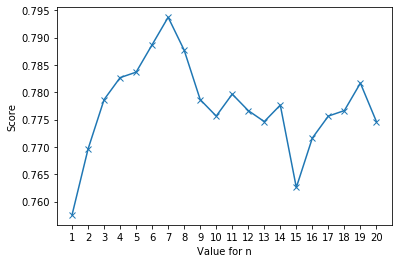

In [28]:
range_n = range(1, len(entropy_with_index))    
op = plt.plot(range_n, scores_train)
plt.setp(op,'marker', 'x')
plt.xlabel("Value for n")
plt.xticks(range_n)
plt.ylabel("Score")
print(max(scores_train), "training score")
print(max(scores_test), "test score")
plt.show()

In [29]:
def kmeans_interaction_featurize(X, X_binned):
    kmeans = []
    KMEANS_RANGE = 16
    generated_features_kmeans = pd.DataFrame()
    for i in range(2, KMEANS_RANGE):
        kmeans.append(KMeans(n_clusters=i, random_state = 0).fit(X))
        generated_features_kmeans[int(str(1) + str(i))] = kmeans[i-2].predict(X)
    generated_features_kmeans = pd.concat([generated_features_kmeans, X_binned], axis=1)
    return generated_features_kmeans

In [30]:
from sklearn.cluster import KMeans
X_binned_kmeans = enc_mi.fit_transform(X_train)
X_binned_test_kmeans = enc_mi.fit_transform(X_test)

In [42]:
enc_mi = KBinsDiscretizer(n_bins=15, encode = "ordinal")
X_binned_mi = pd.DataFrame(enc_mi.fit_transform(X_train))
X_binned_test_mi = pd.DataFrame(enc_mi.fit_transform(X_test))

In [43]:
X_train_kmeans = kmeans_interaction_featurize(X_train, X_binned_mi)
X_test_kmeans = kmeans_interaction_featurize(X_test, X_binned_test_mi)

In [44]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classifier = mutual_info_classif(X_train_kmeans, y_train)
entropy_with_index = sorted([(index, el) for index, el in zip(mutual_info_classifier, X_train_kmeans.columns)], key=lambda x: x[0], reverse=True)

entropy_with_index

[(0.08103175855854361, 113),
 (0.07906709365597897, 19),
 (0.06598019678168732, 111),
 (0.06256994107002489, 115),
 (0.06088067399057073, 2),
 (0.058014771855377845, 6),
 (0.05322159772524149, 114),
 (0.05194195079000341, 112),
 (0.0491195750458977, 18),
 (0.044106210933727796, 17),
 (0.035172478116613615, 4),
 (0.0336888896552916, 3),
 (0.029130879348433503, 12),
 (0.028758445810396882, 0),
 (0.028675541578442987, 110),
 (0.02833388775819068, 16),
 (0.025540072830117833, 15),
 (0.020101283615319154, 13),
 (0.017574552537650723, 5),
 (0.007659362610506593, 14),
 (0.0032781640354366814, 1)]

In [45]:
scores_train_kmeans = []
scores_test_kmeans = []
for i in range(1, len(entropy_with_index)):
    columns = [i[1] for i in entropy_with_index[0:i]]
    knn.fit(X_train_kmeans[columns], y_train)
    score_train_kmeans  = knn.score(X_train_kmeans[columns], y_train)
    score_test_kmeans  = knn.score(X_test_kmeans[columns], y_test)
    scores_train_kmeans.append(score_train_kmeans)
    scores_test_kmeans.append(score_test_kmeans)

0.8088531187122736 training score
0.7122448979591837 test score


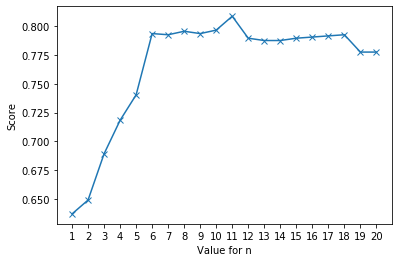

In [46]:
import matplotlib.pyplot as plt
range_n = range(1, len(entropy_with_index))    
op = plt.plot(range_n, scores_train_kmeans)
plt.setp(op,'marker', 'x')
plt.xlabel("Value for n")
plt.xticks(range_n)
plt.ylabel("Score")
print(max(scores_train_kmeans), "training score")
print(max(scores_test_kmeans), "test score")
plt.show()